<a href="https://colab.research.google.com/github/JacopoMangiavacchi/TF-VS-PyTorch/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import PyTorch and TensorFlow

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.3.0


In [3]:
import torch
print(f"pytorch version: {torch.__version__}")

pytorch version: 1.7.0+cu101


# Generating the datasets

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def generate_data(m=0.1, b=0.3, n=200):
    x = np.random.uniform(-10, 10, n)
    noise = np.random.normal(0, 0.15, n)
    y = (m * x + b ) + noise
    return x.astype(np.float32), y.astype(np.float32)

    # x = tf.random.uniform(shape=(n,),minval=-10,maxval=10) 
    # noise = tf.random.normal(shape=(len(x),), stddev=0.15)
    # y = (m * x + b ) + noise
    # return x.numpy(), y.numpy()

## Data Visualization

Text(0, 0.5, 'y')

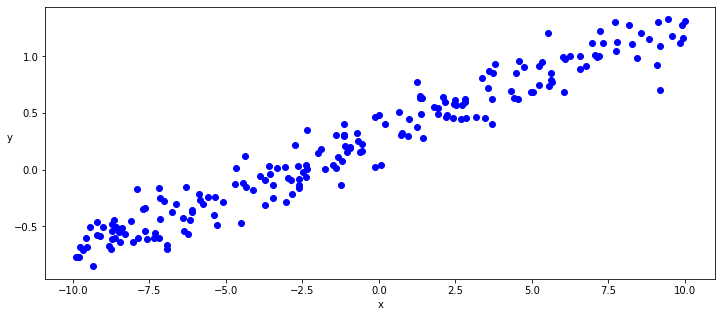

In [6]:
x, y = generate_data()

plt.figure(figsize = (12,5))
ax = plt.subplot(111)
ax.scatter(x,y, c = "b", label="samples")
plt.xlabel("x")
plt.ylabel("y",rotation = 0)

# TensorFlow Dynamic Model

In [7]:
class LinearRegressionKeras(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.w = tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1))
        self.b = tf.Variable(tf.random.uniform(shape=[1], minval=-0.1, maxval=0.1))

    def __call__(self,x): 
        return x * self.w + self.b


# PyTorch Dynamic Model

In [8]:
class LinearRegressionPyTorch(torch.nn.Module): 
    def __init__(self): 
        super().__init__() 
        self.w = torch.nn.Parameter(torch.Tensor(1, 1).uniform_(-0.1, 0.1))
        self.b = torch.nn.Parameter(torch.Tensor(1).uniform_(-0.1, 0.1))
  
    def forward(self, x):  
        return x @ self.w + self.b


# TensorFlow Training

In [9]:
epochs = 500
learning_rate = 0.001

In [10]:
@tf.function
def squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))
    # diff = y_pred - y_true
    # return tf.math.reduce_sum(diff * diff) / tf.size(diff, out_type=tf.dtypes.float32)

tf_model = LinearRegressionKeras()
[w, b] = tf_model.trainable_variables

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        predictions = tf_model(x)
        loss = squared_error(predictions, y)
        
    w_grad, b_grad = tape.gradient(loss, tf_model.trainable_variables)

    w.assign(w - w_grad * learning_rate)
    b.assign(b - b_grad * learning_rate)

    if epoch % 20 == 0:
        print(f"Epoch {epoch} : Loss {loss.numpy()}")

Epoch 0 : Loss 0.07969220727682114
Epoch 20 : Loss 0.07515496015548706
Epoch 40 : Loss 0.07096223533153534
Epoch 60 : Loss 0.0670856460928917
Epoch 80 : Loss 0.06350123137235641
Epoch 100 : Loss 0.06018694490194321
Epoch 120 : Loss 0.05712243542075157
Epoch 140 : Loss 0.05428888276219368
Epoch 160 : Loss 0.05166887119412422
Epoch 180 : Loss 0.049246322363615036
Epoch 200 : Loss 0.047006335109472275
Epoch 220 : Loss 0.04493517428636551
Epoch 240 : Loss 0.0430200919508934
Epoch 260 : Loss 0.0412493459880352
Epoch 280 : Loss 0.03961203992366791
Epoch 300 : Loss 0.038098134100437164
Epoch 320 : Loss 0.03669832646846771
Epoch 340 : Loss 0.035404007881879807
Epoch 360 : Loss 0.03420722857117653
Epoch 380 : Loss 0.03310064971446991
Epoch 400 : Loss 0.03207746520638466
Epoch 420 : Loss 0.03113139607012272
Epoch 440 : Loss 0.030256619676947594
Epoch 460 : Loss 0.029447775334119797
Epoch 480 : Loss 0.02869988977909088


# PyTorch Training

In [11]:
inputs = torch.autograd.Variable(torch.from_numpy(x.reshape(-1, 1)))
labels = torch.autograd.Variable(torch.from_numpy(y.reshape(-1, 1)))


In [12]:
def squared_error(y_pred, y_true):
    return torch.mean(torch.square(y_pred - y_true))
    # diff = y_pred - y_true
    # return torch.sum(diff * diff) / diff.numel()


torch_model = LinearRegressionPyTorch()
[w, b] = torch_model.parameters()

for epoch in range(epochs):
    y_pred = torch_model(inputs)
    loss = squared_error(y_pred, labels)

    loss.backward()

    with torch.no_grad():
        w -= w.grad * learning_rate
        b -= b.grad * learning_rate
        w.grad.zero_()
        b.grad.zero_()

    if epoch % 20 == 0:
      print(f"Epoch {epoch} : Loss {loss.data}")


Epoch 0 : Loss 0.24215355515480042
Epoch 20 : Loss 0.111158087849617
Epoch 40 : Loss 0.09704018384218216
Epoch 60 : Loss 0.09074289351701736
Epoch 80 : Loss 0.08534683287143707
Epoch 100 : Loss 0.08038436621427536
Epoch 120 : Loss 0.07579760998487473
Epoch 140 : Loss 0.07155661284923553
Epoch 160 : Loss 0.06763525307178497
Epoch 180 : Loss 0.0640094056725502
Epoch 200 : Loss 0.0606568343937397
Epoch 220 : Loss 0.057556916028261185
Epoch 240 : Loss 0.05469061806797981
Epoch 260 : Loss 0.05204034224152565
Epoch 280 : Loss 0.04958979785442352
Epoch 300 : Loss 0.04732392728328705
Epoch 320 : Loss 0.04522882401943207
Epoch 340 : Loss 0.043291620910167694
Epoch 360 : Loss 0.04150041565299034
Epoch 380 : Loss 0.039844196289777756
Epoch 400 : Loss 0.038312796503305435
Epoch 420 : Loss 0.036896806210279465
Epoch 440 : Loss 0.03558753430843353
Epoch 460 : Loss 0.03437693044543266
Epoch 480 : Loss 0.03325756639242172


# Data Visualization

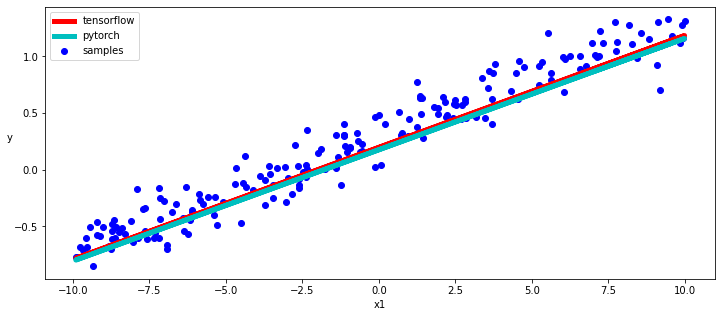

In [13]:
[w_tf, b_tf] = tf_model.trainable_variables
[w_torch, b_torch] = torch_model.parameters()

with torch.no_grad():
  plt.figure(figsize = (12,5))
  ax = plt.subplot(111)
  ax.scatter(x, y, c = "b", label="samples")
  ax.plot(x, w_tf * x + b_tf, "r", linewidth = 5.0, label = "tensorflow")
  ax.plot(x, w_torch * inputs + b_torch, "c", linewidth = 5.0, label = "pytorch")
  ax.legend()
  plt.xlabel("x1")
  plt.ylabel("y",rotation = 0)

# TensorFlow Model with Linear layer

In [14]:
class LinearRegressionKeras(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.linear = tf.keras.layers.Dense(1, activation=None) # , input_shape=[1]

    def call(self, x): 
        return self.linear(x)

# PyTorch Model with Linear layer


In [15]:
class LinearRegressionPyTorch(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionPyTorch, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  

    def forward(self, x):
        return self.linear(x)

# TensorFlow Fit with real Loss function and Optimizer

In [16]:
tf_model_fit = LinearRegressionKeras()
tf_model_fit.compile(optimizer=tf.optimizers.SGD(learning_rate=learning_rate), loss='mean_absolute_error')
# tf_model_fit.build(input_shape=(None, 1))
# tf_model_fit.summary()
tf_model_fit.fit(x, y, epochs=epochs, batch_size=x.shape[0], verbose=1)

Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 4.4751
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 4.4504
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 4.4258
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 4.4011
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 4.3764
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 4.3518
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 4.3271
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 4.3025
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 4.2778
Epoch 10/500
1/1 [==============================] - 0s 1ms/step - loss: 4.2532
Epoch 11/500
1/1 [==============================] - 0s 1ms/step - loss: 4.2285
Epoch 12/500
1/1 [==============================] - 0s 1ms/step - loss: 4.2039
Epoch 13/500
1/1 [==============================] - 0s 2ms/st

# TensorFlow Training with real Loss function and Optimizer

In [17]:
# [w, b] = tf_model.trainable_variables

# for epoch in range(epochs):
#     with tf.GradientTape() as tape:
#         predictions = tf_model(x)
#         loss = tf.losses.mse(predictions, y)
        
#     w_grad, b_grad = tape.gradient(loss, tf_model.trainable_variables)

#     w.assign(w - w_grad * learning_rate)
#     b.assign(b - b_grad * learning_rate)

#     if epoch % 20 == 0:
#         print(f"Epoch {epoch} : Loss {loss.numpy()}")

# PyTorch Training with real Loss function and Optimizer

In [18]:
inputs = torch.autograd.Variable(torch.from_numpy(x.reshape(-1, 1)))
labels = torch.autograd.Variable(torch.from_numpy(y.reshape(-1, 1)))

In [32]:
torch_model = LinearRegressionPyTorch()
[w, b] = torch_model.parameters()

criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(torch_model.parameters(), lr=learning_rate)

for epoch in range(epochs * 3):
    y_pred = torch_model(inputs)
    loss = criterion(y_pred, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
      print(f"Epoch {epoch} : Loss {loss.data}")

Epoch 0 : Loss 11.762385368347168
Epoch 20 : Loss 0.8204290270805359
Epoch 40 : Loss 0.12504224479198456
Epoch 60 : Loss 0.076992467045784
Epoch 80 : Loss 0.07012954354286194
Epoch 100 : Loss 0.06615588068962097
Epoch 120 : Loss 0.06263143569231033
Epoch 140 : Loss 0.059382062405347824
Epoch 160 : Loss 0.05637817457318306
Epoch 180 : Loss 0.053600721061229706
Epoch 200 : Loss 0.05103256553411484
Epoch 220 : Loss 0.04865797981619835
Epoch 240 : Loss 0.04646232724189758
Epoch 260 : Loss 0.04443215951323509
Epoch 280 : Loss 0.04255498945713043
Epoch 300 : Loss 0.04081929102540016
Epoch 320 : Loss 0.03921440243721008
Epoch 340 : Loss 0.03773045912384987
Epoch 360 : Loss 0.03635835647583008
Epoch 380 : Loss 0.03508966788649559
Epoch 400 : Loss 0.03391658514738083
Epoch 420 : Loss 0.03283190727233887
Epoch 440 : Loss 0.03182898461818695
Epoch 460 : Loss 0.030901635065674782
Epoch 480 : Loss 0.030044183135032654
Epoch 500 : Loss 0.0292513370513916
Epoch 520 : Loss 0.028518250212073326
Epoch 5

# Data Visualization

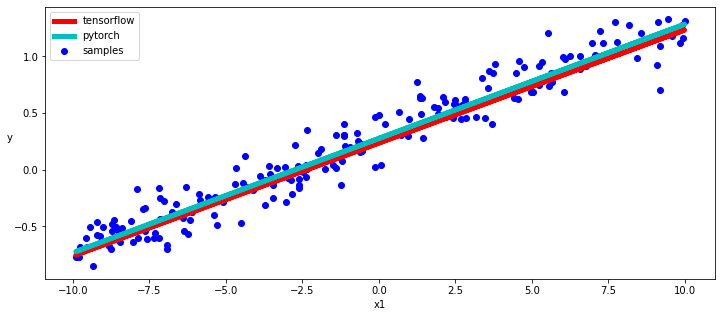

In [33]:
[w_tf, b_tf] = tf_model_fit.trainable_variables
[w_torch, b_torch] = torch_model.parameters()

w_tf = tf.reshape(w_tf, [1])

with torch.no_grad():
  plt.figure(figsize = (12,5))
  ax = plt.subplot(111)
  ax.scatter(x, y, c = "b", label="samples")
  ax.plot(x, w_tf * x + b_tf, "r", linewidth = 5.0, label = "tensorflow")
  ax.plot(x, w_torch * inputs + b_torch, "c", linewidth = 5.0, label = "pytorch")
  ax.legend()
  plt.xlabel("x1")
  plt.ylabel("y",rotation = 0)